# Wrangle and Analyze Data

## Introduction
The task in this project is to data wrangling which contents three stages:

First stage: Gathering data from three resources from CVS, URL, and JSON.
all of which relate to the famous WeRateDogs (@dog_rates) Twitter account. WeRateDogs is a Twitter account that tweets images of dogs their owners send in, along with a funny caption and a rating that almost always exceeds 10/10"

Second stage: Assessing data and define data issues of the quality and tidiness.

Third stage: Cleaning data, Defied each issue and write the code to clean it then, test the clean process.

Finally, after finish data-wrangling start storing, analyzing, and visualizing the data.



## Wrangling The Data

### First : Gathering Data 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from functools import reduce
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Read CSV File
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# 2. Read From URL files (TSV)
folder_name = 'image_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
with open(os.path.join(folder_name,
                      url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv' , sep='\t')


In [5]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# 3. Read JSON File
with open('tweet-json.txt') as file:
    tweet_info = pd.DataFrame(columns = ['tweet_id','favorites','retweets'])
    
    for line in file:
        tweet = json.loads(line)
        info = {'tweet_id': tweet['id'],'favorites': tweet['favorite_count'],
                                      'retweets': tweet['retweet_count']}
        ser = pd.Series(info)
        tweet_info = tweet_info.append(info,ignore_index=True)


In [7]:
tweet_info.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [8]:
# The code that I would use if Twitter provides an API

### Second : Assising Data

#### 1.twitter_archive

In [9]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
453,818588835076603904,NaN,NaN,2017-01-09 22:42:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Chelsea. She forgot how...,7.735476e+17,4.196984e+09,2016-09-07 15:44:53 +0000,https://twitter.com/dog_rates/status/773547596...,11,10,Chelsea,None,None,pupper,None
641,793226087023144960,NaN,NaN,2016-10-31 23:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Juno. She spooked me up real good, but...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/793226087...,11,10,Juno,None,None,None,None
564,802323869084381190,NaN,NaN,2016-11-26 01:31:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Severus. He's here to fix your cable. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/802323869...,13,10,Severus,None,None,None,None
581,800443802682937345,NaN,NaN,2016-11-20 21:00:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He's about to ...,7.761133e+17,4.196984e+09,2016-09-14 17:40:06 +0000,https://twitter.com/dog_rates/status/776113305...,11,10,Sampson,None,None,pupper,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [10]:
twitter_archive.shape

(2356, 17)

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
twitter_archive.duplicated().sum()

0

In [15]:
twitter_archive['tweet_id'].duplicated().sum()

0

In [16]:
pd.options.display.max_rows = None

In [17]:
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Penny              10
Tucker             10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
an                  7
Toby                7
Bailey              7
Daisy               7
Buddy               7
Dave                6
Milo                6
Oscar               6
Koda                6
Bella               6
Jax                 6
Scout               6
Jack                6
Stanley             6
Leo                 6
Rusty               6
Finn                5
Sunny               5
Oakley              5
Gus                 5
George              5
Phil                5
Alfie               5
Larry               5
Sammy               5
Chester             5
very                5
Louis               5
Bentley             5
Walter              4
Maggie              4
Archie              4
just      

In [18]:
for i in list(twitter_archive.name):
    if i[0].islower():
        print(i)

such
a
quite
quite
quite
not
one
incredibly
a
mad
an
very
a
very
just
my
one
not
his
one
a
a
a
an
very
actually
a
just
getting
mad
very
this
unacceptable
all
a
old
a
infuriating
a
a
a
an
a
a
very
getting
just
a
the
the
actually
by
a
officially
a
the
the
a
a
a
a
life
a
one
a
a
a
light
just
space
a
the
a
a
a
a
a
a
a
a
a
an
a
the
a
a
a
a
a
a
a
a
a
a
a
quite
a
an
a
an
the
the
a
a
an
a
a
a
a


In [19]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### 2. image_predictions

In [20]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2050,887343217045368832,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True
1073,716802964044845056,https://pbs.twimg.com/media/CfKYfeBXIAAopp2.jpg,2,malinois,0.619577,True,Leonberg,0.118089,True,bull_mastiff,0.066508,True
472,675145476954566656,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg,1,Labrador_retriever,0.458746,True,Great_Dane,0.235504,True,Staffordshire_bullterrier,0.116864,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
101,667793409583771648,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,1,dalmatian,0.535073,True,English_setter,0.451219,True,Great_Dane,0.008164,True


In [21]:
image_predictions.shape

(2075, 12)

In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [25]:
image_predictions.duplicated().sum()

0

In [26]:
image_predictions.tweet_id.duplicated().sum()

0

In [27]:
image_predictions['p1'].nunique()

378

In [28]:
image_predictions['p2'].nunique()

405

In [29]:
image_predictions['p3'].nunique()

408

In [30]:
image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [31]:
image_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [32]:
image_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

#### 3.tweet_info

In [33]:
tweet_info.sample(5)

,tweet_id,favorites,retweets
1941,673709992831262724,908,306
959,751132876104687617,5610,1480
1373,701889187134500865,3905,1558
1103,734912297295085568,2993,572
164,860177593139703809,0,33421


In [34]:
tweet_info.shape

(2354, 3)

In [35]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   favorites  2354 non-null   object
 2   retweets   2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [36]:
tweet_info.describe()

,tweet_id,favorites,retweets
count,2354,2354,2354
unique,2354,2007,1724
top,667495797102141441,0,3652
freq,1,179,5


In [37]:
tweet_info.isnull().sum()

tweet_id     0
favorites    0
retweets     0
dtype: int64

In [38]:
tweet_info.duplicated().sum()

0

In [39]:
tweet_info['tweet_id'].duplicated().sum()

0

In [40]:
tweet_info['favorites'].max() , tweet_info['favorites'].min() 

(132810, 0)

In [41]:
tweet_info['retweets'].max() , tweet_info['retweets'].min() 

(79515, 0)

In [42]:
df = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweet_info))
df[df.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

#### Assessing Issues
##### Quality Issues :
`twitter_archive `

• The type of tweet_id column is int, should convert to str type.
• The type of timestamp column is object, should convert to datetime type.
• The type of rating_numerator and rating_denominator columns are int, should convert to float type.
• Many columns have no related to the main goal of the project  and have many missing values such as (retweeted_status_id, retweeted_status_user_id) have 2278 missing values, and ( retweeted_status_timestamp ,in_reply_to_status_id, in_reply_to_user_id) have 2175 missing values of 2356 row in the dataframe.
• The expanded_urls column has 59 missing values.
• The column name, there many incorrect  names such as (None , such , a , quite , not , one , incredibly ,mad , an ,very , just , my , his , actually , getting , mad , this , unacceptable, all , old , infuriating , the , by , officially , life , light, space)  
• The rating_denominator column have some values that are more than 10.

`image_predictions `

• The type of tweet_id is an integer, should convert to string.

`tweets_info `

• The type of favorites column is object, should convert to integer.
• The type of retweets column is object, should convert to integer.


##### Tidiness Issues 
• There are three DataFrame, should merge into one master DataFrame.
• In `twitter_archive`, there are four columns for dogs describe (doggo, floofer, pupper, puppo) , should be in one column.

### Third: Cleaning Data

#### Copy All DataFrames
The first thing to do before start cleaning  data is to copy each of the DataFrame. So, any change will not affect the original DataFrame

In [43]:
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
tweet_info_copy = tweet_info.copy()

#### Cleaning

#####   First Issue (Missing data)

##### Define :
delete unuseful columns from `twitter_archive_copy`

##### Code

In [44]:
twitter_archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id' ,'retweeted_status_timestamp' ,
                           'in_reply_to_user_id' ,'in_reply_to_user_id' , 'in_reply_to_status_id'] ,
                          axis = 1 , inplace=True )

##### Test

In [45]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


#### Second Issue (Tidiness)

#### Tidiness Issue #1
##### Define :
Merge the three DataFrame into one DataFrame (master)  , use tweet_id as the key

##### Code

In [46]:
all_df = [twitter_archive_copy , image_predictions_copy , tweet_info_copy]
master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id' , how='inner'), all_df)


##### Test :

In [47]:
pd.options.display.max_columns = None

In [48]:
master.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets


In [49]:
master.shape

(2073, 25)

In [50]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   object 
 1   timestamp           2073 non-null   object 
 2   source              2073 non-null   object 
 3   text                2073 non-null   object 
 4   expanded_urls       2073 non-null   object 
 5   rating_numerator    2073 non-null   int64  
 6   rating_denominator  2073 non-null   int64  
 7   name                2073 non-null   object 
 8   doggo               2073 non-null   object 
 9   floofer             2073 non-null   object 
 10  pupper              2073 non-null   object 
 11  puppo               2073 non-null   object 
 12  jpg_url             2073 non-null   object 
 13  img_num             2073 non-null   int64  
 14  p1                  2073 non-null   object 
 15  p1_conf             2073 non-null   float64
 16  p1_dog

In [51]:
master.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
favorites             0
retweets              0
dtype: int64

In [52]:
master.duplicated().sum()

0

In [53]:
master.tweet_id.nunique()

2073

#### Tidiness Issue #2
##### Define :
Merge the four columns of dogs describe(doggo, floofer, pupper, puppo) into one column(dog_describe)

##### Code :

In [54]:
master['doggo'].value_counts()

None     1993
doggo      80
Name: doggo, dtype: int64

In [55]:
master['floofer'].value_counts()

None       2065
floofer       8
Name: floofer, dtype: int64

In [56]:
master['pupper'].value_counts()

None      1852
pupper     221
Name: pupper, dtype: int64

In [57]:
master['puppo'].value_counts()

None     2049
puppo      24
Name: puppo, dtype: int64

In [58]:
dog_stages=['doggo','floofer','pupper','puppo']
master[dog_stages]=master[dog_stages].replace('None',np.nan)
master['dog_stage']=master[dog_stages].apply(lambda x: ','.join(x[x.notnull()]),axis=1)
master.dog_stage.value_counts()

                 1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

##### Test :

In [59]:
master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage
879,740214038584557568,2016-06-07 16:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is getting incredibly frustrating. This i...,https://twitter.com/dog_rates/status/740214038...,10,10,getting,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg,1,Chesapeake_Bay_retriever,0.586414,True,Labrador_retriever,0.189782,True,vizsla,0.067607,True,7335,2220,
677,767754930266464257,2016-08-22 16:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Philbert. His toilet broke and he does...,https://twitter.com/dog_rates/status/767754930...,11,10,Philbert,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CqedCQWWgAIab9L.jpg,1,vizsla,0.307794,True,fountain,0.142185,False,Chesapeake_Bay_retriever,0.113903,True,17814,6221,
1492,678767140346941444,2015-12-21 02:41:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She makes awful decisions. 8/10 h...,https://twitter.com/dog_rates/status/678767140...,8,10,Mia,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CWt3G6EVEAIGEPr.jpg,1,harp,0.821120,False,window_screen,0.025121,False,mosquito_net,0.016716,False,3864,1553,
279,831309418084069378,2017-02-14 01:09:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter and his son Montoya. Scooter ...,https://twitter.com/dog_rates/status/831309418...,12,10,Scooter,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg,1,Doberman,0.369389,True,kelpie,0.132449,True,Labrador_retriever,0.074727,True,12819,2786,
811,748932637671223296,2016-07-01 17:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Divine Doggo. Must be magical af....,https://twitter.com/dog_rates/status/748932637...,13,10,Divine,doggo,NaN,NaN,NaN,https://pbs.twimg.com/media/CmS-QkQWAAAkUa-.jpg,1,borzoi,0.742912,True,wire-haired_fox_terrier,0.204082,True,English_setter,0.021032,True,6461,2564,doggo


In [60]:
master['dog_stage'].value_counts()

                 1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [61]:
master['dog_stage'].isnull().sum()

0

#### Third Issue (Quality )

##### Quality Issue #1
###### Define :
convert tweet_id column into Str

##### Code

In [62]:
master['tweet_id'] = master['tweet_id'].astype(str)

##### Test

In [63]:
master['tweet_id'].dtype

dtype('O')

##### Quality Issues #2
##### Define :
convert timestamp column into datetime

##### Code

In [64]:
master['timestamp'] = pd.to_datetime(master['timestamp'])


##### Test

In [65]:
master['timestamp'].dtype

datetime64[ns, UTC]

##### Quality Issue #3
###### Define :
convert retweets , favorites columns into int

###### Code :

In [66]:
master['retweets'] = master['retweets'].astype(int)
master['favorites'] = master['favorites'].astype(int)

###### Test :

In [67]:
master['retweets'].dtype , master['favorites'].dtype

(dtype('int64'), dtype('int64'))

In [68]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   object             
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   expanded_urls       2073 non-null   object             
 5   rating_numerator    2073 non-null   int64              
 6   rating_denominator  2073 non-null   int64              
 7   name                2073 non-null   object             
 8   doggo               80 non-null     object             
 9   floofer             8 non-null      object             
 10  pupper              221 non-null    object             
 11  puppo               24 non-null     object             
 12  jpg_url             2073 non-null 

##### Quality Issue #4
###### Define :
convert rating_numerator , rating_denominator columns into float

###### Code :

In [69]:
master['rating_numerator'] = master['rating_numerator'].astype(float)
master['rating_denominator'] = master['rating_denominator'].astype(float)

###### Test :

In [70]:
master['rating_numerator'].dtype , master['rating_denominator'].dtype

(dtype('float64'), dtype('float64'))

##### Quality Issue #5
###### Define :
 Change the dog_describe , img_num columns into  category

###### Code :

In [71]:
master['dog_stage'] = master['dog_stage'].astype('category')
master['img_num'] = master['img_num'].astype('category')


###### Test :

In [72]:
master['dog_stage'].dtype , master['img_num'].dtype

(CategoricalDtype(categories=['', 'doggo', 'doggo,floofer', 'doggo,pupper', 'doggo,puppo',
                   'floofer', 'pupper', 'puppo'],
                  ordered=False),
 CategoricalDtype(categories=[1, 2, 3, 4], ordered=False))

##### Quality Issue #6
###### Define :
Change the incorrect names(None , and all name which it first letter is lowercase) in name column to be Nan

###### Code :

In [73]:
master['name'].replace(('None' , 'such' , 'a' , 'quite' , 'not' , 'one' , 'incredibly' ,'mad' , 'an' ,'very' ,
                        'just' , 'my' , 'his' , 'actually' , 'getting' , 'mad' , 'this' , 'unacceptable', 'all' ,
                        'old' , 'infuriating' , 'the' , 'by' , 'officially' , 'life' , 'light', 'space' ) ,
                       np.nan, inplace = True)


###### Test : 

In [74]:
master['name'].value_counts(sort=True)

Charlie           11
Penny             10
Oliver            10
Lucy              10
Cooper            10
Tucker            10
Bo                 8
Winston            8
Lola               8
Sadie              8
Toby               7
Daisy              7
Stanley            6
Bella              6
Milo               6
Dave               6
Jax                6
Bailey             6
Scout              6
Koda               6
Rusty              6
Buddy              5
Louis              5
Larry              5
Leo                5
Alfie              5
Oscar              5
Chester            5
Archie             4
Maggie             4
George             4
Bentley            4
Loki               4
Gary               4
Sophie             4
Chip               4
Dexter             4
Clark              4
Phil               4
Walter             4
Sunny              4
Winnie             4
Jerry              4
Bear               4
Ruby               4
Reggie             4
Finn               4
Gus          

In [75]:
master['name'].isnull().sum()

677

In [76]:
master.describe()

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorites,retweets
count,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2073.000000
mean,12.265798,10.511819,0.594532,1.346665e-01,6.034005e-02,8556.718283,2976.089243
std,40.699924,7.180517,0.271234,1.006830e-01,5.092769e-02,12098.640994,5054.897526
min,0.000000,2.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,16.000000
25%,10.000000,10.000000,0.364095,5.390140e-02,1.619920e-02,1674.000000,634.000000
50%,11.000000,10.000000,0.588230,1.186220e-01,4.947150e-02,3864.000000,1408.000000
75%,12.000000,10.000000,0.843911,1.955730e-01,9.193000e-02,10937.000000,3443.000000
max,1776.000000,170.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000


##### Quality Issue #7
###### Define :
Drop rows that contain rating denominator values that not equal to 10.

###### Code :

In [77]:
incorrect_values = master.query("rating_denominator != 10  ")
incorrect_values.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage
345,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,13518,3716,
415,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,5927,1655,
734,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,5316,2539,
876,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9.0,11.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,20648,9220,
924,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,4196,1434,


In [78]:
incorrect_values.index

Int64Index([ 345,  415,  734,  876,  924,  967, 1001, 1022, 1047, 1065, 1131,
            1207, 1379, 1380, 1405, 1512, 1571, 2052],
           dtype='int64')

In [79]:
master.drop([ 345,  415,  734,  876,  924,  967, 1001, 1022, 1047, 1065, 1131,
            1207, 1379, 1380, 1405, 1512, 1571, 2052] , axis= 0 , inplace=True)

###### Test :

In [80]:
master.query("rating_denominator != 10")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage


#### Store Clean Dataframe as CSV File

In [81]:
master.to_csv('twitter_archive_master.csv', encoding='utf-8' , index=False)

## Analyze The Data & Insights

In [82]:
master.describe()

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorites,retweets
count,2055.000000,2055.0,2055.000000,2.055000e+03,2.055000e+03,2055.000000,2055.000000
mean,11.705596,10.0,0.594253,1.349953e-01,6.028451e-02,8578.100243,2980.346472
std,40.058908,0.0,0.271356,1.007979e-01,5.081368e-02,12132.959055,5065.327011
min,0.000000,10.0,0.044333,1.011300e-08,1.740170e-10,0.000000,16.000000
25%,10.000000,10.0,0.363272,5.409535e-02,1.608055e-02,1663.000000,633.000000
50%,11.000000,10.0,0.587830,1.192430e-01,4.948690e-02,3865.000000,1407.000000
75%,12.000000,10.0,0.843799,1.963605e-01,9.203645e-02,10957.000000,3449.500000
max,1776.000000,10.0,1.000000,4.880140e-01,2.710420e-01,132810.000000,79515.000000


In [83]:
master.corr()

,rating_numerator,rating_denominator,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,favorites,retweets
rating_numerator,1.000000,NaN,-0.009033,-0.028746,-0.013583,-0.033609,-0.004584,-0.029860,0.015664,0.017646
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p1_conf,-0.009033,NaN,1.000000,0.117643,-0.511405,0.132154,-0.710721,0.108325,0.077032,0.046017
p1_dog,-0.028746,NaN,0.117643,1.000000,0.113013,0.633675,0.049679,0.555300,0.058219,0.008518
p2_conf,-0.013583,NaN,-0.511405,0.113013,1.000000,0.100892,0.477326,0.068507,-0.023909,-0.009505
p2_dog,-0.033609,NaN,0.132154,0.633675,0.100892,1.000000,0.041626,0.551123,0.060511,0.017017
p3_conf,-0.004584,NaN,-0.710721,0.049679,0.477326,0.041626,1.000000,0.043503,-0.054360,-0.036963
p3_dog,-0.029860,NaN,0.108325,0.555300,0.068507,0.551123,0.043503,1.000000,0.046040,0.008651
favorites,0.015664,NaN,0.077032,0.058219,-0.023909,0.060511,-0.054360,0.046040,1.000000,0.789940
retweets,0.017646,NaN,0.046017,0.008518,-0.009505,0.017017,-0.036963,0.008651,0.789940,1.000000


#### Insight #1
We can see that 39% of the rating_numerator are above the avarage , and there are not relationship between number or retweets or number of favorites with the rating 

In [84]:
rating_numerator_mean = master["rating_numerator"].mean()
rating_numerator_mean

11.70559610705596

In [85]:
rating_numerator_query = master[master['rating_numerator'] > rating_numerator_mean]
rating_numerator_above_avarage =(rating_numerator_query['tweet_id'].count() /master['tweet_id'].count() * 100)
rating_numerator_above_avarage

39.02676399026764

In [86]:
rating = master['rating_numerator']/master['rating_denominator']

In [87]:
 master['retweets'].corr(rating)

0.01764576960282421

In [88]:
 master['favorites'].corr(rating)

0.015663516175089237

#### Insight #2
There is a positive relationship between the number of retweets and the number of favorites

In [89]:
correlation = master['retweets'].corr(master['favorites'])
correlation

0.789940471197129

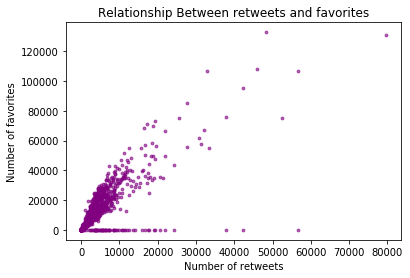

In [90]:
tf_plot = plt.scatter(master['retweets'], master['favorites'], color=['purple'] ,alpha=0.6, s=8)
plt.title('Relationship Between retweets and favorites')
plt.xlabel('Number of retweets')
plt.ylabel('Number of favorites')
plt.show()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size


#### Insight #3
The most common stage in these data frame are pupper , then doggo after that puppo and last comman stage is floofe

In [91]:
dogs_stage = master['dog_stage'].value_counts()
dogs_stage

                 1735
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

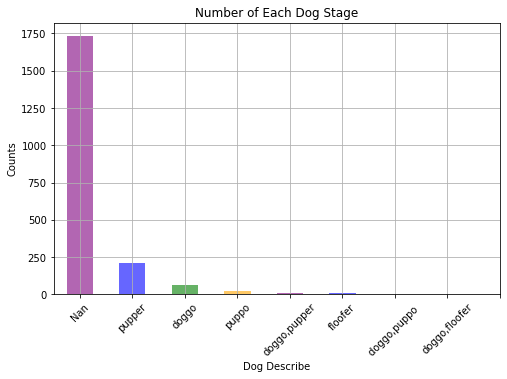

In [92]:
dogs_stage.plot(kind='bar' , color=['purple', 'blue', 'green', 'Orange'],
                   grid = True, figsize=(8,5) , alpha=0.6 , rot=45) ;
plt.title('Number of Each Dog Stage') ; 
plt.xlabel("Dog Describe") ;
plt.ylabel("Counts") ;
positions = (0, 1 , 2,3 , 4 , 5, 6 , 7 , 8);
labels = ( "Nan","pupper", "doggo" , "puppo" , "doggo,pupper","floofer" , "doggo,puppo " , "doggo,floofer");
plt.xticks(positions, labels) ;
plt.savefig('insight_3')

#### Insight #4
The most common dogs names

In [93]:
top_10_name = master['name'].value_counts()
top_10_name[:10]

Charlie    11
Tucker     10
Penny      10
Oliver     10
Lucy       10
Cooper     10
Winston     8
Lola        8
Bo          8
Sadie       8
Name: name, dtype: int64

#### Insight #5
Here are the top 10 dog type for each prediction that correctly predicted.

In [94]:
p1_true = master.query("p1_dog == True")

In [95]:
p1_top = p1_true['p1'].value_counts()
p1_top[:10]

golden_retriever      146
Labrador_retriever     97
Pembroke               88
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

In [96]:
p2_true = master.query("p2_dog == True")

In [97]:
p2_top =p2_true['p2'].value_counts()
p2_top[:10]

Labrador_retriever          104
golden_retriever             90
Cardigan                     73
Pomeranian                   42
Chihuahua                    42
French_bulldog               41
Chesapeake_Bay_retriever     41
toy_poodle                   36
miniature_poodle             33
Siberian_husky               33
Name: p2, dtype: int64

In [98]:
p3_true = master.query("p3_dog == True")

In [99]:
p3_top = p3_true['p3'].value_counts()
p3_top[:10]

Labrador_retriever           77
Chihuahua                    58
golden_retriever             47
Eskimo_dog                   37
kelpie                       35
kuvasz                       34
Staffordshire_bullterrier    32
chow                         31
cocker_spaniel               31
beagle                       30
Name: p3, dtype: int64

In [100]:
top_true = p1_top + p2_top + p3_top
top_30 = top_true.sort_values(ascending=False)[:30]
top_30

golden_retriever                  283.0
Labrador_retriever                278.0
Chihuahua                         183.0
Pembroke                          142.0
Cardigan                          115.0
Pomeranian                        109.0
toy_poodle                        104.0
pug                                96.0
chow                               95.0
French_bulldog                     93.0
cocker_spaniel                     93.0
Chesapeake_Bay_retriever           91.0
Eskimo_dog                         82.0
beagle                             76.0
kuvasz                             73.0
Siberian_husky                     71.0
Staffordshire_bullterrier          70.0
Samoyed                            68.0
malamute                           68.0
Pekinese                           63.0
kelpie                             62.0
miniature_pinscher                 57.0
American_Staffordshire_terrier     57.0
Great_Pyrenees                     53.0
miniature_poodle                   53.0


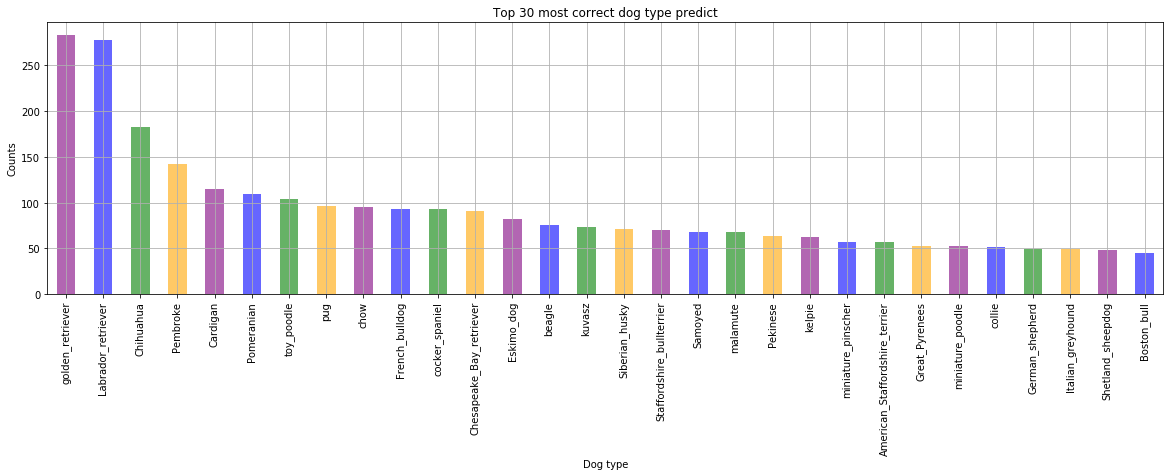

In [101]:
top_30.plot(kind='bar' , color = ['purple', 'blue', 'green', 'Orange'] ,grid = True, figsize=(20,5) ,
                   alpha=0.6 , rot=90) ;
plt.title('Top 30 most correct dog type predict') ; 
plt.xlabel("Dog type") ;
plt.ylabel("Counts") ;
plt.savefig('insight_5')

In [102]:
last_30 = top_true.sort_values(ascending=True)[:30]
last_30

standard_schnauzer             3.0
komondor                       6.0
Japanese_spaniel               6.0
wire-haired_fox_terrier        8.0
EntleBucher                    8.0
briard                         9.0
Sussex_spaniel                 9.0
giant_schnauzer               10.0
silky_terrier                 11.0
miniature_schnauzer           11.0
Australian_terrier            12.0
cairn                         12.0
Mexican_hairless              12.0
Walker_hound                  13.0
Leonberg                      13.0
Greater_Swiss_Mountain_dog    13.0
Afghan_hound                  13.0
Dandie_Dinmont                13.0
Bernese_mountain_dog          13.0
curly-coated_retriever        14.0
Norwich_terrier               15.0
groenendael                   16.0
Appenzeller                   16.0
bluetick                      16.0
Blenheim_spaniel              17.0
Ibizan_hound                  17.0
Border_terrier                17.0
black-and-tan_coonhound       18.0
Weimaraner          

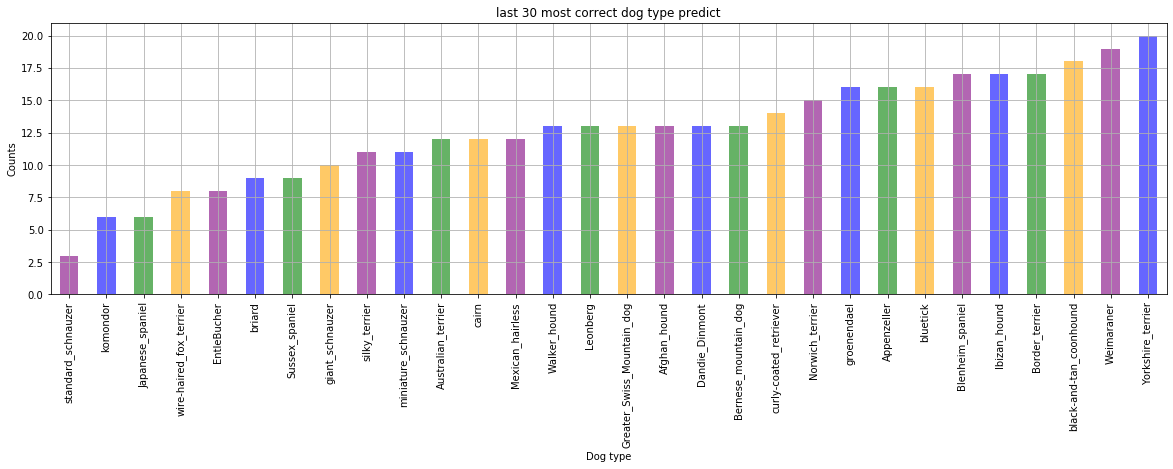

In [103]:
last_30.plot(kind='bar' , color =['purple', 'blue', 'green', 'Orange'] ,grid = True, figsize=(20,5) ,
                   alpha=0.6 , rot=90) ;
plt.title('last 30 most correct dog type predict') ; 
plt.xlabel("Dog type") ;
plt.ylabel("Counts") ;

#### Insight #6
The percentage of false prediction for all predictions = 15.66%

In [104]:
false_prediction = master.query("p1_dog == False and p2_dog == False and p3_dog == False")

In [105]:
false_prediction_per = (false_prediction['tweet_id'].count() / master['tweet_id'].count()) *100
false_prediction_per

15.669099756690997

In [106]:
false_prediction.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage
1873,669661792646373376,2015-11-25 23:39:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a brave dog. Excellent free climber. T...,https://twitter.com/dog_rates/status/669661792...,5.0,10.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CUsd2TfWwAAmdjb.jpg,1,weasel,0.262802,False,Siamese_cat,0.148263,False,hamster,0.116374,False,860,482,
255,834167344700198914,2017-02-21 22:26:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sunshine. She doesn't believe in perso...,https://twitter.com/dog_rates/status/834167344...,11.0,10.0,Sunshine,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg,1,ox,0.991682,False,bison,0.005335,False,water_buffalo,0.001130,False,17194,4130,


#### Insight #7
The percentage of true prediction for :
p1 = 73.77%
p2 = 74.74%
p3 = 72.16%
So, we can say the most accurate predictions is the p2.

In [107]:
p1_value = master['p1_dog'].value_counts()
p1_true = (p1_value[True] / master['p1_dog'].count()) * 100
p1_true

73.77128953771289

In [108]:
p1_group = master.groupby(['p1_dog'])['p1'].count()

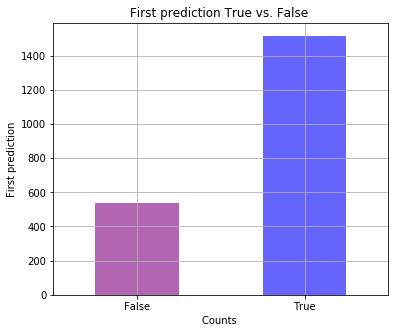

In [109]:
p1_number = p1_group.plot.bar(color=['purple', 'blue' ] , 
             grid = True, figsize = (6,5), alpha = 0.6 , rot=0)
plt.title("First prediction True vs. False ");
plt.xlabel("Counts ") ;
plt.ylabel("First prediction") ;
plt.savefig('insight_7_1')

In [110]:
p2_value = master['p2_dog'].value_counts()
p2_true = (p2_value[True] / master['p2_dog'].count()) * 100
p2_true

74.74452554744525

In [111]:
p2_group = master.groupby(['p2_dog'])['p2'].count()

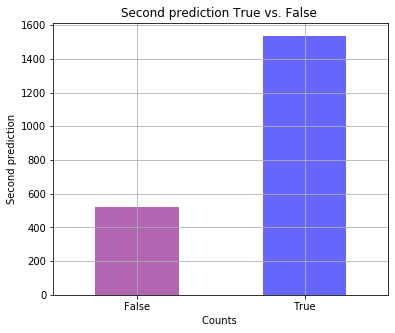

In [112]:
p2_number = p2_group.plot.bar(color=['purple', 'blue'] , 
             grid = True, figsize = (6,5), alpha = 0.6 , rot=0)
plt.title("Second prediction True vs. False ");
plt.xlabel("Counts ") ;
plt.ylabel("Second prediction") ;
plt.savefig('insight_7_2')

In [113]:
p3_value = master['p3_dog'].value_counts()
p3_true = (p3_value[True] / master['p3_dog'].count()) * 100
p3_true

72.1654501216545

In [114]:
p3_group = master.groupby(['p3_dog'])['p3'].count()

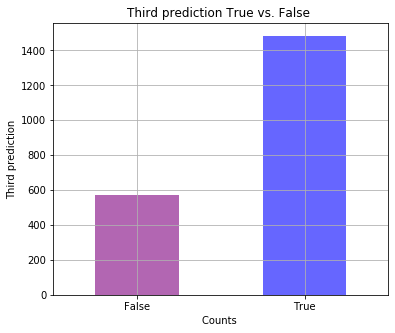

In [115]:
p3_number = p3_group.plot.bar(color=['purple', 'blue'] , 
             grid = True, figsize = (6,5), alpha = 0.6 , rot=0)
plt.title("Third prediction True vs. False ");
plt.xlabel("Counts ") ;
plt.ylabel("Third prediction") ;
plt.savefig('insight_7_3')

In [116]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0